# Digit Recognizing Neural
## Preprocessing

### Import Libraries
- OS(os)
- NumPy(numpy)
    - NumPy Arrays
- OpenCV 2(cv2)
    - Load and process images
- TensorFlow(tensorflow)
    - Build network
Optional:
- MatPlotLib(matplotlib)
    - Visualization

In [14]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

### Import MNIST database
- Already split into training and testing data
    - Otherwise use 80-20 ratio from data

In [15]:
mnist = tf.keras.datasets.mnist

## Load data into two tuples of training and testing data
- x_train - Image to train with
- y_train - What the image is supposed to be
- x_test - Image to test with
- y_test - What the image is supposed to be

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize Data
- Scale everything to be between 0-1 instead of 0-255
    - Normalize function makes sure all values in the vector add up to one, competitive normalization
- MNIST data is shaped like (number of images, pixels in each image)
    - axis = 0 means you normalize each individual pixel relative to other pixels in the same position across all images
    - axis = 1 means you normalize each pixel relative to other pixels in the same image
- For images, divide by 255 to make values between 0 and 1

In [17]:
x_train = x_train/255.0
x_test = x_test/255.0


## Model
### Create Model and Add Layers
- Define variable 'model' as a Sequential model, the most basic type
- Add each layer individually to the model
    - Add first layer as a "flattened" version of the image, meaning transforming the 28 $\times$ 28 matrix into a 784 $\times$ 1 vector
    - Add a Dense layer, where each neuron is connected to each other neuron from the other layers
        - Dense layers are your actual layers that make the network
        - first parameter - define how many neurons you want
        - activation - define which activation function you want to use, usually 'relu' for hidden layers
    - Keep adding Dense layers for your middle layers as you need
    - Add a final dense layer with 10 neurons(for each digit) and activation as 'softmax'
        -  softmax function assigns a probability of "how likely is this digit to be correct" to each last layer neuron
            - Forces each value of the last layer neurons to add up to 1

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #Alternate way to use relu
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

### Compile Model
- Choose optimizer(usually 'adam')
    - Adam is an advanced version of SGD which still uses mini-batching and gradient descent, just in a more optimizied way than pure mini-batching/pure sgd
- Choose loss function(for this example, 'sparse_categorical_crossentropy'
    -   Calculates cost/loss with -log($p_{y}$) where p is the model's probability and y is the expected probability(Usually 1)
        - Works since log tends to -$\infty$ faster as x approaches 0 than when x approaches $\infty$
            - Softmax squishes into 0-1, so when it's 0, the activation value needs to change by infinity(a lot) and when it's 1, the value doesn't need to change(definition of -log(x))
- Choose metrics to monitor in evaluate(for this example, 'accuracy' and 'mse')

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8784 - loss: 0.4069
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.9693 - loss: 0.0986
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.9783 - loss: 0.0684


### Save and Load Model


In [20]:
model.save('handwritten.keras')
model = tf.keras.models.load_model('handwritten.keras')

### Monitoring
- Print how model is updating loss and cost
- evaluate() returns cost/lost and other metrics provided in the compile function
    - Pass the testing dataframes

In [21]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9707 - loss: 0.0889


### Testing with Custom Images
- Set image_number to 0 since the first file is Digit0
- loops through the current directory while a file Digit{image_number} exists
- imread() searches for a file titled Digit{number} and returns a NumPy array of shape (height, width, color in BGR)
    - Use NumPy slicing to change it to only have one color instead of all 3 with [:, :, 0], selecting all columns, all rows, and the color blue since channel 0 in BGR corresponds to blue
        - This is because you have to invert the array eventually since predict() takes an array of the shape (1, height, width), so you need to turn the 3 channels of color into one channel
- Use OpenCV resize() to resize the image to 28x28 pixels since that's the input the model takes
- Use NumPy invert method to invert the array so it matches the input shape requirement of predict()
- Make a prediction about the image with predict()
- Use MatPlotLib method imshow() and plt.show() to show the image being predicted
    - imshow() takes in the image as a parameter and applies a grayscale colormap which shows exactly what version of the image the model will process

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


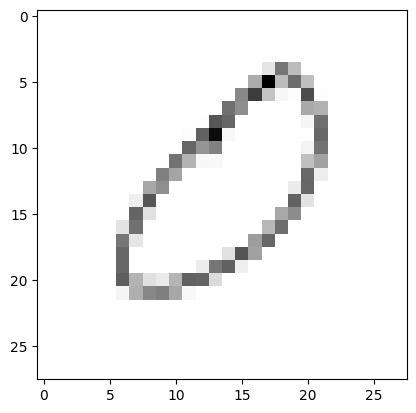

The number is probably: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


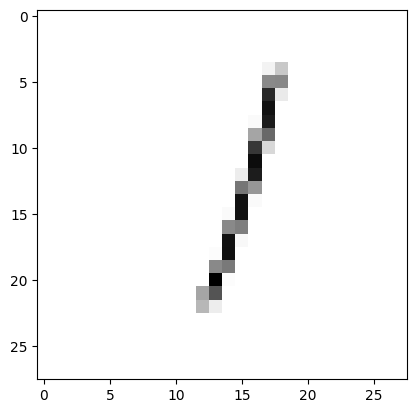

The number is probably: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


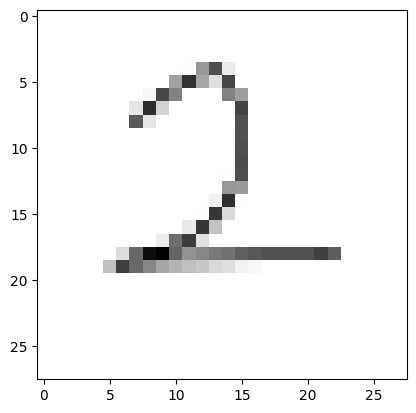

The number is probably: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


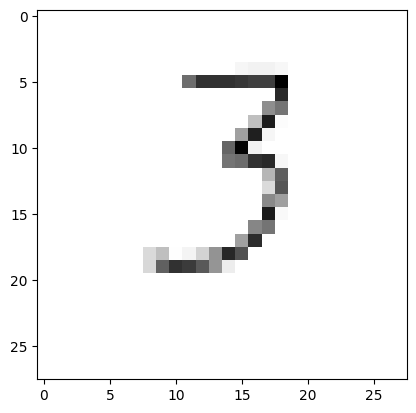

The number is probably: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


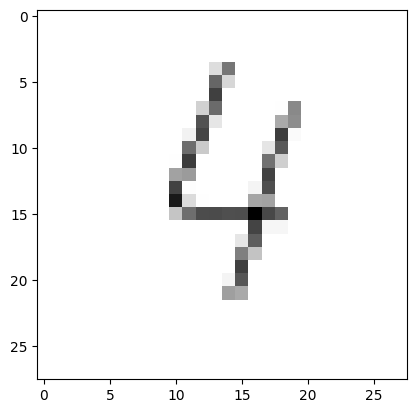

The number is probably: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


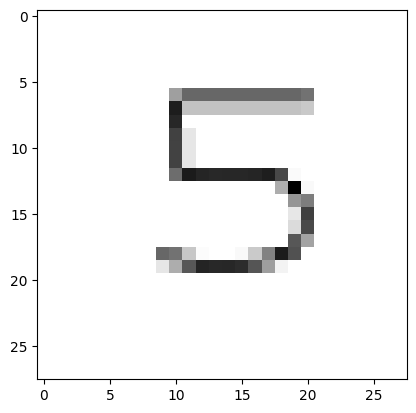

The number is probably: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


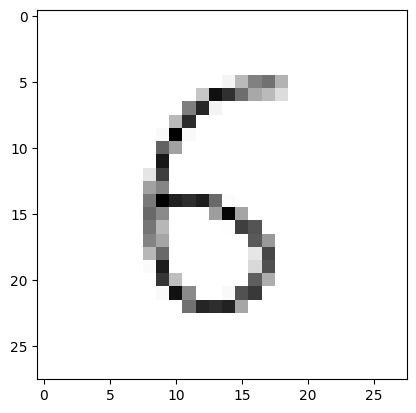

The number is probably: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


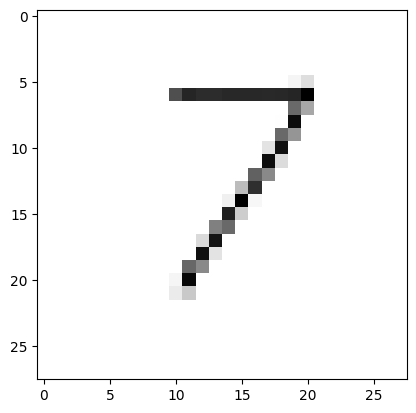

The number is probably: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


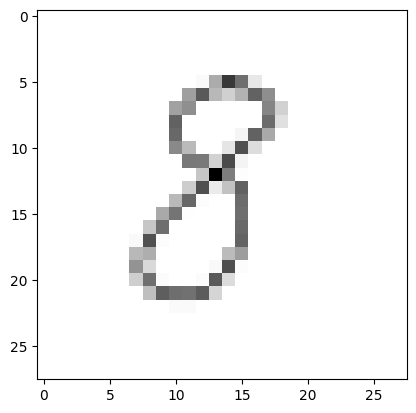

The number is probably: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


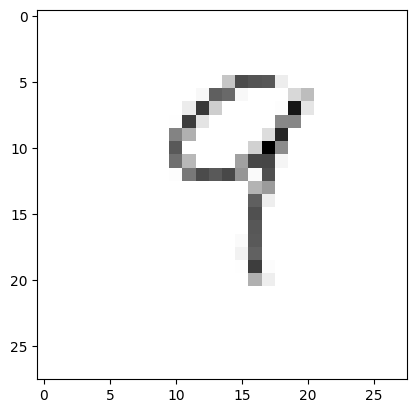

The number is probably: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


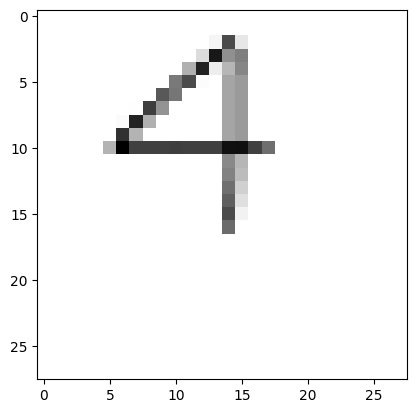

The number is probably: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


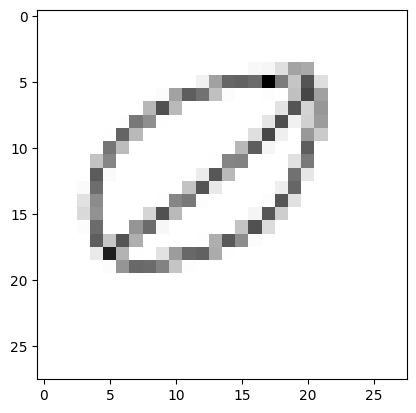

The number is probably: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


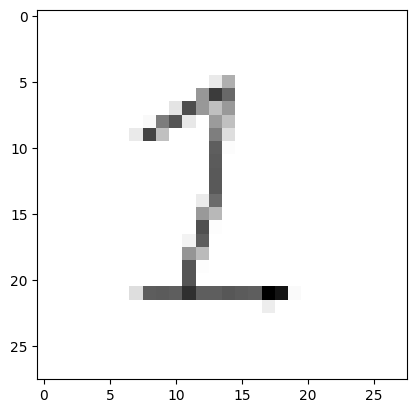

The number is probably: 2


In [23]:
image_number = 0
while os.path.isfile(f"Digit{image_number}.png"):
    try:
        img = cv2.imread(f"Digit{image_number}.png")[:,:,0]
        img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
        print(f"The number is probably: {np.argmax(prediction)}")
    except FileNotFoundError:
        print("File wasn't found")
    except IndexError:
        print("Index out of range")
    except:
        print("Unexpected error:", sys.exc_info()[0])
    finally: image_number += 1
